In [1]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torch import nn


class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 32),
            nn.ReLU(True),
            nn.Linear(32,4))
        self.decoder = nn.Sequential(
            nn.Linear(4,32),
            nn.ReLU(True),
            nn.Linear(32,128),
            nn.ReLU(True),
            nn.Linear(128,28*28),
            nn.Tanh()
        )

    def forward(self, x):
            latent = self.encoder(x)
            x = self.decoder(latent)
            return x, latent


In [2]:
batch_size = 32
learning_rate = 2e-3
num_epochs = 10


data_train = MNIST('~/mnist_data', train=True, download=True,
                   transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5])]))
data_loader = DataLoader(data_train, batch_size=batch_size, shuffle = False)

model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(
    model.parameters(), lr=learning_rate)

import matplotlib.pyplot as plt

for epoch in range(num_epochs): 
    for data in data_loader:
        #print(data[0].size())
        img, labels = data
        #print(img.size())
        img = img.view(img.size(0),-1)
        #print(img.size())
        
        output, latent = model(img)
        loss = criterion(output,img)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.data.item()}')


/Users/zarius/miniconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


epoch [1/10], loss:0.13707274198532104
epoch [2/10], loss:0.12644298374652863
epoch [3/10], loss:0.12176790088415146
epoch [4/10], loss:0.12234281748533249
epoch [5/10], loss:0.11907635629177094
epoch [6/10], loss:0.11859436333179474
epoch [7/10], loss:0.11874638497829437
epoch [8/10], loss:0.11745864152908325
epoch [9/10], loss:0.11875549703836441
epoch [10/10], loss:0.11915550380945206


torch.Size([32, 4])
torch.Size([32, 784])
torch.Size([28, 28])


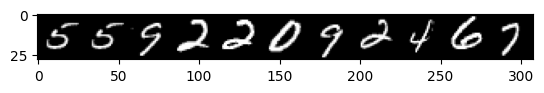

torch.Size([1, 2, 2])


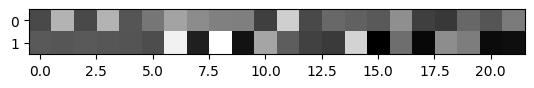

torch.Size([1, 28, 28])


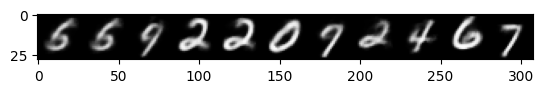

In [3]:
import numpy as np
print(latent.size())
print(img.size())


img = img.view(32,28,28)
print(img[0].size())
display = np.array(img[0].detach(),dtype='float')
pixels = display.reshape((28, 28))

for i in range(10):
    #print(i)
    display_1 = np.array(img[i].detach(),dtype='float')
    pixels_1 = display_1.reshape((28, 28))
    pixels= np.concatenate((pixels,pixels_1),axis=1)
    
plt.imshow(pixels, cmap='gray')
plt.show()

latent = latent.view(32,1,2,2)
print(latent[0].size())
display = np.array(latent[0].detach(),dtype='float')
pixels = display.reshape((2, 2))

for i in range(10):
    #print(i)
    display_1 = np.array(latent[i].detach(),dtype='float')
    pixels_1 = display_1.reshape((2, 2))
    pixels= np.concatenate((pixels,pixels_1),axis=1)
    
plt.imshow(pixels, cmap='gray')
plt.show()


output = output.view(32,1, 28,28)
print(output[0].size())
display = np.array(output[0].detach(),dtype='float')
pixels = display.reshape((28, 28))

for i in range(10):
    #print(i)
    display_1 = np.array(output[i].detach(),dtype='float')
    pixels_1 = display_1.reshape((28, 28))
    pixels= np.concatenate((pixels,pixels_1),axis=1)
    
plt.imshow(pixels, cmap='gray')
plt.show()
